<a href="https://colab.research.google.com/github/shoofiash/BootcampTask/blob/main/Extra%20Classs%20-%20Explonatory%20Data%20Analysis.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

### Import Data

In [2]:
# import database
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


In [3]:
df = pd.read_csv("/content/drive/MyDrive/diamonds.csv")

df

,Unnamed: 0,carat,cut,color,clarity,depth,table,price,x,y,z
0,1,0.23,Ideal,E,SI2,61.5,55.0,326,3.95,3.98,2.43
1,2,0.21,Premium,E,SI1,59.8,61.0,326,3.89,3.84,2.31
2,3,0.23,Good,E,VS1,56.9,65.0,327,4.05,4.07,2.31
3,4,0.29,Premium,I,VS2,62.4,58.0,334,4.20,4.23,2.63
4,5,0.31,Good,J,SI2,63.3,58.0,335,4.34,4.35,2.75
...,...,...,...,...,...,...,...,...,...,...,...
53935,53936,0.72,Ideal,D,SI1,60.8,57.0,2757,5.75,5.76,3.50
53936,53937,0.72,Good,D,SI1,63.1,55.0,2757,5.69,5.75,3.61
53937,53938,0.70,Very Good,D,SI1,62.8,60.0,2757,5.66,5.68,3.56
53938,53939,0.86,Premium,H,SI2,61.0,58.0,2757,6.15,6.12,3.74


Kolom-kolom dari dataset 'diamonds.csv' memiliki definisi sebagai berikut:
- price: price in US dollars ($326--$18,823)
- carat: weight of the diamond (0.2--5.01)
- cut: quality of the cut (Fair, Good, Very Good, Premium, Ideal)
- color: diamond colour, from J (worst) to D (best)
- clarity: a measurement of how clear the diamond is (I1 (worst), SI2, SI1, VS2, VS1, VVS2, VVS1, IF (best))
- x: length in mm 
- y: width in mm 
- z: depth in mm 
- depth: total depth percentage = z / mean(x, y) = 2 * z / (x + y) 
- table: width of top of diamond relative to widest point


### Soal:

1. Periksalah apakah setiap kolom sudah memiliki tipe data yang benar? Jika ada yang belum benar, mohon diperbaiki.
2. Periksalah apakah terdapat missing values? Jika ya, berapa baris yang memiliki missing values? 
3. Buatlah visualisasi untuk memeriksa distribusi pada kolom-kolom 'x', 'y', dan 'z'. Apakah ada hal yang janggal? Jika ya, apa saja kejanggalan yang dimaksud? Berapa banyak kejanggalan yang terjadi?
4. Seorang calon pembeli berlian bertanya kepada kalian, "Konon katanya semakin tinggi kualitas `clarity` dari sebuah berlian, maka harganya pun akan semakin mahal. Tapi mengapa rata-rata harga berlian dengan clarity `SI2` lebih tinggi dari rata-rata harga berlain dengan clarity `IF`?" Coba berikan penjelasan (dan mungkin visualisasi) yang dapat membantu kalian menjawab kebingungan calon pembeli tersebut!

**1. Inspeksi Data**

In [4]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 53940 entries, 0 to 53939
Data columns (total 11 columns):
 #   Column      Non-Null Count  Dtype  
---  ------      --------------  -----  
 0   Unnamed: 0  53940 non-null  int64  
 1   carat       53940 non-null  float64
 2   cut         53940 non-null  object 
 3   color       53940 non-null  object 
 4   clarity     53940 non-null  object 
 5   depth       53940 non-null  float64
 6   table       53940 non-null  float64
 7   price       53940 non-null  int64  
 8   x           53940 non-null  float64
 9   y           53940 non-null  float64
 10  z           53940 non-null  float64
dtypes: float64(6), int64(2), object(3)
memory usage: 4.5+ MB


Bagian unnamed: 0 merupakan index (penomoran). Sehingga bisa dihapus saja karena menyebabkan kolom index menjadi dua. 

In [5]:
df.drop('Unnamed: 0', axis=1, inplace=True)

In [6]:
# recheck
df

,carat,cut,color,clarity,depth,table,price,x,y,z
0,0.23,Ideal,E,SI2,61.5,55.0,326,3.95,3.98,2.43
1,0.21,Premium,E,SI1,59.8,61.0,326,3.89,3.84,2.31
2,0.23,Good,E,VS1,56.9,65.0,327,4.05,4.07,2.31
3,0.29,Premium,I,VS2,62.4,58.0,334,4.20,4.23,2.63
4,0.31,Good,J,SI2,63.3,58.0,335,4.34,4.35,2.75
...,...,...,...,...,...,...,...,...,...,...
53935,0.72,Ideal,D,SI1,60.8,57.0,2757,5.75,5.76,3.50
53936,0.72,Good,D,SI1,63.1,55.0,2757,5.69,5.75,3.61
53937,0.70,Very Good,D,SI1,62.8,60.0,2757,5.66,5.68,3.56
53938,0.86,Premium,H,SI2,61.0,58.0,2757,6.15,6.12,3.74


Tipe data pada setiap feature sudah sesuai

**2. Menghitung missing value**

In [7]:
# melakukan pengecekan unique pada setiap features
for x in df.columns:
  print(f"unik dari {x}")
  print(f"{df[x].unique()}")
  print()

unik dari carat
[0.23 0.21 0.29 0.31 0.24 0.26 0.22 0.3  0.2  0.32 0.33 0.25 0.35 0.42
 0.28 0.38 0.7  0.86 0.71 0.78 0.96 0.73 0.8  0.75 0.74 0.81 0.59 0.9
 0.91 0.61 0.77 0.63 0.76 0.64 0.72 0.79 0.58 1.17 0.6  0.83 0.54 0.98
 0.52 1.01 0.53 0.84 0.51 1.05 0.55 0.87 1.   0.57 0.82 1.04 0.93 1.2
 0.99 0.34 0.43 0.36 0.95 0.89 1.02 0.97 0.56 0.85 0.92 1.27 0.66 1.12
 0.68 1.03 0.62 1.22 1.08 0.88 0.5  1.19 0.39 0.65 1.24 1.5  0.27 0.41
 1.13 1.06 0.69 0.4  1.14 0.94 1.29 1.52 1.16 1.21 1.23 1.09 0.67 1.11
 1.1  1.18 1.15 1.25 1.07 1.28 1.51 0.37 1.31 1.26 1.39 1.44 1.35 1.3
 1.32 1.41 1.36 1.45 1.34 1.58 1.54 1.38 1.33 1.74 1.64 1.47 1.4  1.55
 1.95 2.   1.37 1.83 1.62 1.57 1.69 2.06 1.72 1.66 2.14 1.49 1.46 2.15
 1.96 2.22 1.7  1.53 1.85 2.01 2.27 1.68 1.56 1.81 1.65 1.82 2.03 1.73
 1.59 1.42 1.43 2.08 1.48 1.6  2.49 1.71 2.02 2.07 3.   2.21 2.1  1.91
 2.25 2.17 2.32 2.72 1.61 2.23 2.11 2.05 1.63 2.3  2.31 1.75 2.04 2.12
 1.77 2.5  1.8  1.67 1.84 2.2  3.01 1.88 2.33 2.68 2.34 1.9  2.1

In [8]:
#melihat jumlah null pada kolom
df.isnull().sum()

carat      0
cut        0
color      0
clarity    0
depth      0
table      0
price      0
x          0
y          0
z          0
dtype: int64

Bentuk null pada kolom bisa saja tidak hanya berbentuk NaN, tetapi berbentuk (?). Tetapi, pada setiap unique feature, tidak terdapat NaN maupun (?). Setelah dilakukan penjumlahan, tidak terdapat nilai null pada setiap kolom

**3. Distribusi kolom**

**kolom x**

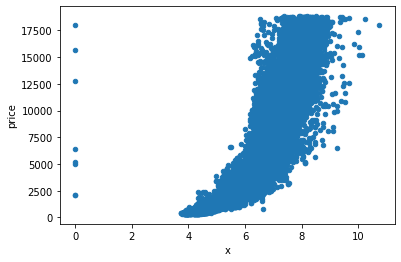

In [9]:
df.plot(x="x", y="price", kind="scatter")
plt.show()

Dari grafik diatas, dapat dilihat bahwa terdapat kecenderungan peningkatan harga ketika diamond semakin panjang.

In [10]:
df.loc[df["x"] < 1]

,carat,cut,color,clarity,depth,table,price,x,y,z
11182,1.07,Ideal,F,SI2,61.6,56.0,4954,0.0,6.62,0.0
11963,1.00,Very Good,H,VS2,63.3,53.0,5139,0.0,0.00,0.0
15951,1.14,Fair,G,VS1,57.5,67.0,6381,0.0,0.00,0.0
24520,1.56,Ideal,G,VS2,62.2,54.0,12800,0.0,0.00,0.0
26243,1.20,Premium,D,VVS1,62.1,59.0,15686,0.0,0.00,0.0
27429,2.25,Premium,H,SI2,62.8,59.0,18034,0.0,0.00,0.0
49556,0.71,Good,F,SI2,64.1,60.0,2130,0.0,0.00,0.0
49557,0.71,Good,F,SI2,64.1,60.0,2130,0.0,0.00,0.0


Namun, terdapat kejanggalan yaitu ternyata terdapat beberapa nilai 0 pada kolom x. Hal ini bisa saja disebabkan karena nilai x belum diinput pada 8 baris diatas

melakukan imputasi pada baris ke 11182

In [11]:
x_si2 = df[(df["cut"]=="Ideal") & (df["color"]=="F") & (df["clarity"]=="SI2") & (df["carat"]==1.07)]
x_si2 = pd.DataFrame(x_si2)

In [12]:
x_si2_average = x_si2["x"].mean()
x_si2_average

6.019166666666667

In [13]:
z_si2_average = x_si2["z"].mean()
z_si2_average

3.713333333333333

In [14]:
df.loc[11182, "x"] = 6.01
df.loc[11182,"z"] = 3.71
df.loc[11182]

carat       1.07
cut        Ideal
color          F
clarity      SI2
depth       61.6
table       56.0
price       4954
x           6.01
y           6.62
z           3.71
Name: 11182, dtype: object

melakukan imputasi pada baris ke 11963

In [15]:
x_vs2 = df[(df["cut"]=="Very Good") & (df["color"]=="H") & (df["clarity"]=="VS2") & (df["carat"]==1.00)]
x_vs2 = pd.DataFrame(x_vs2)

In [16]:
x_vs2_average = x_vs2["x"].mean()
x_vs2_average

5.8172727272727265

In [17]:
y_vs2_average = x_vs2["y"].mean()
y_vs2_average

5.805454545454546

In [18]:
z_vs2_average = x_vs2["z"].mean()
z_vs2_average

3.6136363636363638

In [19]:
df.loc[11963, "x"] = 5.81
df.loc[11963, "y"] = 5.80
df.loc[11963, "z"] = 3.61
df.loc[11963]

carat            1.0
cut        Very Good
color              H
clarity          VS2
depth           63.3
table           53.0
price           5139
x               5.81
y                5.8
z               3.61
Name: 11963, dtype: object

melakukan imputasi pada baris ke 15951

In [70]:
x_vs1 = df[(df["cut"]=="Fair") & (df["color"]=="G") & (df["clarity"]=="VS1") & (df["carat"]==1.14)]
x_vs1 = pd.DataFrame(x_vs1)

In [71]:
x_vs1_average = x_vs1["x"].mean()
x_vs1_average

5.59

In [72]:
y_vs1_average = x_vs1["y"].mean()
y_vs1_average

5.53

In [73]:
z_vs1_average = x_vs1["z"].mean()
z_vs1_average

3.52

In [24]:
df.loc[15951, "x"] = 5.59
df.loc[15951, "y"] = 5.53
df.loc[15951, "z"] = 3.52
df.loc[15951]

carat      1.14
cut        Fair
color         G
clarity     VS1
depth      57.5
table      67.0
price      6381
x          5.59
y          5.53
z          3.52
Name: 15951, dtype: object

melakukan imputasi pada baris ke 24520

In [74]:
x_vs2_2 = df[(df["cut"]=="Ideal") & (df["color"]=="G") & (df["clarity"]=="VS2") & (df["carat"]==1.56)]
x_vs2_2 = pd.DataFrame(x_vs2_2)

In [75]:
x_vs2_2_average = x_vs2_2["x"].mean()
x_vs2_2_average

7.436666666666667

In [76]:
y_vs2_2_average = x_vs2_2["y"].mean()
y_vs2_2_average

7.486666666666667

In [77]:
z_vs2_2_average = x_vs2_2["z"].mean()
z_vs2_2_average

4.609999999999999

In [78]:
df.loc[24520, "x"] = 7.43
df.loc[24520, "y"] = 7.48
df.loc[24520, "z"] = 4.60
df.loc[24520]

carat       1.56
cut        Ideal
color          G
clarity      VS2
depth       62.2
table       54.0
price      12800
x           7.43
y           7.48
z            4.6
Name: 24520, dtype: object

melakukan imputasi pada baris ke 26243

In [79]:
x_vvs1 = df[(df["cut"]=="Premium") & (df["color"]=="D") & (df["clarity"]=="VVS1") & (df["carat"]==1.20)]
x_vvs1 = pd.DataFrame(x_vvs1)

In [80]:
x_vvs1_average = x_vvs1["x"].mean()
x_vvs1_average

4.94

In [81]:
y_vvs1_average = x_vvs1["y"].mean()
y_vvs1_average

4.92

In [82]:
z_vvs1_average = x_vvs1["z"].mean()
z_vvs1_average

3.01

In [34]:
df.loc[26243, "x"] = 4.94
df.loc[26243, "y"] = 4.92
df.loc[26243, "z"] = 3.01
df.loc[26243]

carat          1.2
cut        Premium
color            D
clarity       VVS1
depth         62.1
table         59.0
price        15686
x             4.94
y             4.92
z             3.01
Name: 26243, dtype: object

melakukan imputasi pada baris ke 27429	

In [83]:
x_si2_2 = df[(df["cut"]=="Premium") & (df["color"]=="H") & (df["clarity"]=="SI2") & (df["carat"]==2.25)]
x_si2_2 = pd.DataFrame(x_si2_2)

In [84]:
x_si2_2_average = x_si2_2["x"].mean()
x_si2_2_average

6.92

In [85]:
y_si2_2_average = x_si2_2["y"].mean()
y_si2_2_average

6.97

In [86]:
z_si2_2_average = x_si2_2["z"].mean()
z_si2_2_average

4.22

In [87]:
df.loc[27429, "x"] = 6.92
df.loc[27429, "y"] = 6.97
df.loc[27429, "z"] = 4.22
df.loc[27429]

carat         2.25
cut        Premium
color            H
clarity        SI2
depth         62.8
table         59.0
price        18034
x             6.92
y             6.97
z             4.22
Name: 27429, dtype: object

melakukan imputasi pada baris ke 49556



In [88]:
x_si2_3 = df[(df["cut"]=="Good") & (df["color"]=="F") & (df["clarity"]=="SI2") & (df["carat"]==0.71)]
x_si2_3 = pd.DataFrame(x_si2_3)

In [89]:
x_si2_3_average = x_si2_3["x"].mean()
x_si2_3_average

5.628

In [90]:
y_si2_3_average = x_si2_3["y"].mean()
y_si2_3_average

5.608

In [91]:
z_si2_3_average = x_si2_3["z"].mean()
z_si2_3_average

3.594

In [92]:
df.loc[49556, "x"] = 5.62
df.loc[49556, "y"] = 5.60
df.loc[49556, "z"] = 3.59
df.loc[49556]

carat      0.71
cut        Good
color         F
clarity     SI2
depth      64.1
table      60.0
price      2130
x          5.62
y           5.6
z          3.59
Name: 49556, dtype: object

melakukan imputasi pada baris ke 49557

In [93]:
x_si2_4 = df[(df["cut"]=="Good") & (df["color"]=="F") & (df["clarity"]=="SI2") & (df["carat"]==0.71)]
x_si2_4 = pd.DataFrame(x_si2_4)

In [94]:
x_si2_4_average = x_si2_4["x"].mean()
x_si2_4_average

5.624

In [95]:
y_si2_4_average = x_si2_4["y"].mean()
y_si2_4_average

5.603999999999999

In [96]:
z_si2_4_average = x_si2_4["z"].mean()
z_si2_4_average

3.592

In [97]:
df.loc[49557, "x"] = 5.62
df.loc[49557, "y"] = 5.60
df.loc[49557, "z"] = 3.59
df.loc[49557]

carat      0.71
cut        Good
color         F
clarity     SI2
depth      64.1
table      60.0
price      2130
x          5.62
y           5.6
z          3.59
Name: 49557, dtype: object

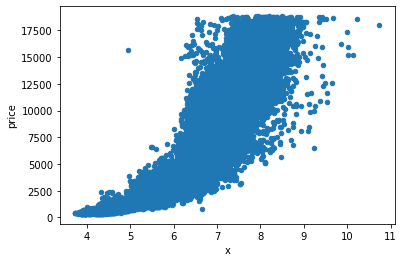

In [98]:
# after imputasi
df.plot(x="x", y="price", kind="scatter")
plt.show()

**kolom y**

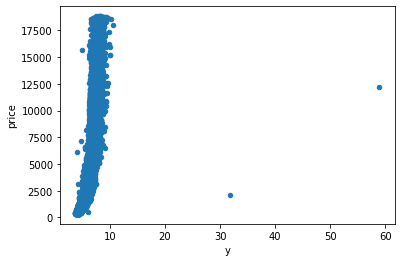

In [51]:
df.plot(x="y", y="price", kind="scatter")
plt.show()

Bentuk grafik persebaran kolom y cukup aneh, sehingga kita perlu cek karena mungkin terdapat nilai 0 seperti kolom x

In [52]:
df.loc[df["y"] == 0]

,carat,cut,color,clarity,depth,table,price,x,y,z


Ternyata tidak terdapat nilai 0 pada kolom y, sehingga mungkin karena disebabkan nilai y yang besar yaitu >30

In [53]:
df.loc[df["y"] > 30]

,carat,cut,color,clarity,depth,table,price,x,y,z
24067,2.00,Premium,H,SI2,58.9,57.0,12210,8.09,58.9,8.06
49189,0.51,Ideal,E,VS1,61.8,55.0,2075,5.15,31.8,5.12


Mari kita cek pada baris ke 24067

In [54]:
y_si_2 = df[(df["cut"]=="Premium") & (df["color"]=="H") & (df["clarity"]=="SI2") & (df["carat"]==2.00)]
y_si_2

,carat,cut,color,clarity,depth,table,price,x,y,z
23080,2.0,Premium,H,SI2,61.4,59.0,11108,8.07,8.00,4.93
23194,2.0,Premium,H,SI2,62.1,60.0,11202,8.10,8.01,5.30
23882,2.0,Premium,H,SI2,62.8,57.0,11975,8.05,8.01,5.04
24003,2.0,Premium,H,SI2,62.7,58.0,12168,8.06,8.01,5.04
24067,2.0,Premium,H,SI2,58.9,57.0,12210,8.09,58.90,8.06
24614,2.0,Premium,H,SI2,62.5,58.0,12940,8.14,8.03,5.05
24771,2.0,Premium,H,SI2,61.5,61.0,13134,8.13,8.10,4.99
26081,2.0,Premium,H,SI2,60.7,60.0,15312,8.07,8.11,4.91
26146,2.0,Premium,H,SI2,59.7,61.0,15451,8.20,8.15,4.88
26147,2.0,Premium,H,SI2,60.7,60.0,15451,8.11,8.07,4.91


Pada baris 49189, memiliki nilai yang terlalu besar dibandingkan dengan tabel lain dengan kategori yang sama. Sehingga, nilai y pada baris 24067 bisa diperbaiki dahulu. Nilai rata-rata y = 8.04

In [55]:
df.loc[24067, "y"] = 8.04
df.loc[24067]

carat          2.0
cut        Premium
color            H
clarity        SI2
depth         58.9
table         57.0
price        12210
x             8.09
y             8.04
z             8.06
Name: 24067, dtype: object

Selanjutnya yaitu melakukan pengecekan untuk baris 49189

In [56]:
y_vs_1 = df[(df["cut"]=="Ideal") & (df["color"]=="E") & (df["clarity"]=="VS1") & (df["carat"]==0.51)]
y_vs_1

,carat,cut,color,clarity,depth,table,price,x,y,z
44954,0.51,Ideal,E,VS1,62.7,56.0,1636,5.10,5.14,3.21
45692,0.51,Ideal,E,VS1,61.8,55.0,1697,5.15,5.18,3.19
45780,0.51,Ideal,E,VS1,61.5,53.0,1708,5.17,5.24,3.20
46326,0.51,Ideal,E,VS1,62.7,56.0,1758,5.14,5.10,3.21
46328,0.51,Ideal,E,VS1,61.5,56.0,1758,5.11,5.16,3.16
46351,0.51,Ideal,E,VS1,60.9,56.0,1759,5.16,5.22,3.16
47239,0.51,Ideal,E,VS1,62.0,57.0,1841,5.11,5.15,3.18
47424,0.51,Ideal,E,VS1,61.8,56.0,1851,5.17,5.19,3.20
47425,0.51,Ideal,E,VS1,61.5,56.0,1851,5.16,5.11,3.16
49186,0.51,Ideal,E,VS1,62.8,57.0,2075,5.10,5.07,3.20


Pada baris 49189, memiliki nilai yang terlalu besar dibandingkan dengan tabel lain dengan kategori yang sama. Sehingga, nilai y pada baris 49189 bisa diperbaiki dahulu. Nilai rata-rata y = 5.15

In [57]:
df.loc[49189, "y"] = 5.15
df.loc[49189]

carat       0.51
cut        Ideal
color          E
clarity      VS1
depth       61.8
table       55.0
price       2075
x           5.15
y           5.15
z           5.12
Name: 49189, dtype: object

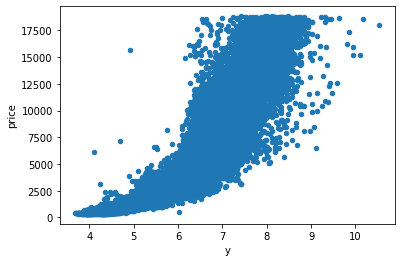

In [58]:
# after plot
df.plot(x="y", y="price", kind="scatter")
plt.show()

Pada kolom y (lebar diamond) juga terdapat hubungan yaitu semakin lebar diamond, maka relatif semakin tinggi harga diamond tersebut

**kolom z**

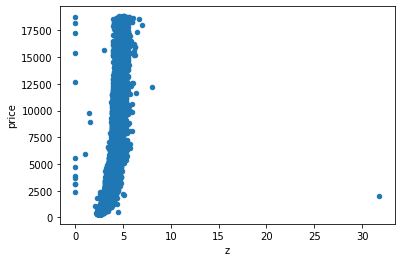

In [59]:
df.plot(x="z", y="price", kind="scatter")
plt.show()

Bentuk grafik cukup aneh, sehingga perlu dicek dahulu

In [60]:
df.loc[df["z"] == 0]

,carat,cut,color,clarity,depth,table,price,x,y,z
2207,1.00,Premium,G,SI2,59.1,59.0,3142,6.55,6.48,0.0
2314,1.01,Premium,H,I1,58.1,59.0,3167,6.66,6.60,0.0
4791,1.10,Premium,G,SI2,63.0,59.0,3696,6.50,6.47,0.0
5471,1.01,Premium,F,SI2,59.2,58.0,3837,6.50,6.47,0.0
10167,1.50,Good,G,I1,64.0,61.0,4731,7.15,7.04,0.0
13601,1.15,Ideal,G,VS2,59.2,56.0,5564,6.88,6.83,0.0
24394,2.18,Premium,H,SI2,59.4,61.0,12631,8.49,8.45,0.0
26123,2.25,Premium,I,SI1,61.3,58.0,15397,8.52,8.42,0.0
27112,2.20,Premium,H,SI1,61.2,59.0,17265,8.42,8.37,0.0
27503,2.02,Premium,H,VS2,62.7,53.0,18207,8.02,7.95,0.0


Terdapat beberapa angka 0 pada kolom z, sehingga perlu dilakukan imputasi dahulu

melakukan imputasi pada baris ke 2207


In [99]:
x_si2_6 = df[(df["cut"]=="Premium") & (df["color"]=="G") & (df["clarity"]=="SI2") & (df["carat"]==1.00)]
x_si2_6 = pd.DataFrame(x_si2_6)

In [100]:
z_si2_6_average = x_si2_6["z"].mean()
z_si2_6_average

3.9224999999999994

In [101]:
df.loc[2207, "z"] = 3.92
df.loc[2207]

carat          1.0
cut        Premium
color            G
clarity        SI2
depth         59.1
table         59.0
price         3142
x             6.55
y             6.48
z             3.92
Name: 2207, dtype: object

melakukan imputasi pada baris ke 2314

In [64]:
x_i1 = df[(df["cut"]=="Premium") & (df["color"]=="H") & (df["clarity"]=="I1") & (df["carat"]==1.01)]
x_i1 = pd.DataFrame(x_i1)

In [65]:
x_i1_average = x_i1["z"].mean()
x_i1_average

2.563333333333333

In [66]:
df.loc[2314, "z"] = 2.56
df.loc[2314]

carat         1.01
cut        Premium
color            H
clarity         I1
depth         58.1
table         59.0
price         3167
x             6.66
y              6.6
z             2.56
Name: 2314, dtype: object

melakukan imputasi pada baris ke 4791

In [67]:
x_si2_7 = df[(df["cut"]=="Premium") & (df["color"]=="G") & (df["clarity"]=="SI2") & (df["carat"]==1.10)]
x_si2_7 = pd.DataFrame(x_si2_7)

In [68]:
z_si2_7_average = x_si2_7["z"].mean()
z_si2_7_average

2.04

In [69]:
df.loc[4791, "z"] = 2.04
df.loc[4791]

carat          1.1
cut        Premium
color            G
clarity        SI2
depth         63.0
table         59.0
price         3696
x              6.5
y             6.47
z             2.04
Name: 4791, dtype: object

melakukan imputasi pada baris ke 5471

In [102]:
x_si2_8 = df[(df["cut"]=="Premium") & (df["color"]=="F") & (df["clarity"]=="SI2") & (df["carat"]==1.01)]
x_si2_8 = pd.DataFrame(x_si2_8)

In [103]:
z_si2_8_average = x_si2_8["z"].mean()
z_si2_8_average

3.8610638297872333

In [104]:
df.loc[5471, "z"] = 3.86
df.loc[5471]

carat         1.01
cut        Premium
color            F
clarity        SI2
depth         59.2
table         58.0
price         3837
x              6.5
y             6.47
z             3.86
Name: 5471, dtype: object

melakukan imputasi pada baris ke 10167

In [105]:
x_i1_2 = df[(df["cut"]=="Good") & (df["color"]=="G") & (df["clarity"]=="I1") & (df["carat"]==1.50)]
x_i1_2 = pd.DataFrame(x_i1_2)

In [106]:
x_i1_2_average = x_i1_2["z"].mean()
x_i1_2_average

2.97

In [107]:
df.loc[10167, "z"] = 2.97
df.loc[10167]

carat       1.5
cut        Good
color         G
clarity      I1
depth      64.0
table      61.0
price      4731
x          7.15
y          7.04
z          2.97
Name: 10167, dtype: object

melakukan imputasi pada baris ke 13601

In [109]:
x_vs_2 = df[(df["cut"]=="Ideal") & (df["color"]=="G") & (df["clarity"]=="VS2") & (df["carat"]==1.15)]
x_vs_2 = pd.DataFrame(x_vs_2)

In [110]:
z_vs_2_average = x_vs_2["z"].mean()
z_vs_2_average

3.12

In [111]:
df.loc[13601, "z"] = 3.12
df.loc[13601]

carat       1.15
cut        Ideal
color          G
clarity      VS2
depth       59.2
table       56.0
price       5564
x           6.88
y           6.83
z           3.12
Name: 13601, dtype: object

melakukan imputasi pada baris ke 24394

In [112]:
x_si2_9 = df[(df["cut"]=="Premium") & (df["color"]=="H") & (df["clarity"]=="SI2") & (df["carat"]==2.18)]
x_si2_9 = pd.DataFrame(x_si2_9)

In [113]:
z_si2_9_average = x_si2_9["z"].mean()
z_si2_9_average

3.3966666666666665

In [114]:
df.loc[24394, "z"] = 3.39
df.loc[24394]

carat         2.18
cut        Premium
color            H
clarity        SI2
depth         59.4
table         61.0
price        12631
x             8.49
y             8.45
z             3.39
Name: 24394, dtype: object

melakukan imputasi pada baris ke 26123

In [115]:
x_si1_4 = df[(df["cut"]=="Premium") & (df["color"]=="I") & (df["clarity"]=="SI1") & (df["carat"]==2.25)]
x_si1_4 = pd.DataFrame(x_si1_4)

In [116]:
z_si1_4_average = x_si1_4["z"].mean()
z_si1_4_average

2.565

In [117]:
df.loc[26123, "z"] = 2.56
df.loc[26123]

carat         2.25
cut        Premium
color            I
clarity        SI1
depth         61.3
table         58.0
price        15397
x             8.52
y             8.42
z             2.56
Name: 26123, dtype: object

melakukan imputasi pada baris ke 27112

In [125]:
x_si1_5 = df[(df["cut"]=="Premium") & (df["color"]=="H") & (df["clarity"]=="SI1") & (df["carat"]==2.0)]
x_si1_5 = pd.DataFrame(x_si1_5)

karena carat = 2.20 yang sesuai dengan baris 27112 tidak ada angka lain selain 0 pada z-nya, sehingga menggunakan carat 2.0 untuk pendekatan

In [126]:
z_si1_5_average = x_si1_5["z"].mean()
z_si1_5_average

4.905555555555555

In [127]:
df.loc[27112, "z"] = 4.90
df.loc[27112]

carat          2.2
cut        Premium
color            H
clarity        SI1
depth         61.2
table         59.0
price        17265
x             8.42
y             8.37
z              4.9
Name: 27112, dtype: object

melakukan imputasi pada baris ke 27503

In [128]:
x_vs2_4 = df[(df["cut"]=="Premium") & (df["color"]=="H") & (df["clarity"]=="VS2") & (df["carat"]==2.02)]
x_vs2_4 = pd.DataFrame(x_vs2_4)

In [129]:
z_vs2_4_average = x_vs2_4["z"].mean()
z_vs2_4_average

3.313333333333334

In [130]:
df.loc[27503, "z"] = 3.31
df.loc[27503]

carat         2.02
cut        Premium
color            H
clarity        VS2
depth         62.7
table         53.0
price        18207
x             8.02
y             7.95
z             3.31
Name: 27503, dtype: object

melakukan imputasi pada baris ke 27739

In [136]:
x_si2_10 = df[(df["cut"]=="Good") & (df["color"]=="G") & (df["clarity"]=="SI2") & (df["carat"]==2.52)]
x_si2_10

,carat,cut,color,clarity,depth,table,price,x,y,z
27239,2.52,Good,G,SI2,63.7,59.0,17608,8.57,8.52,5.44


karena tidak terdapat carat 2.8, maka melakukan pendekatan dengan menggunakan carat 2.52 sebagai nilai terdekat

In [137]:
z_si2_10_average = x_si2_10["z"].mean()
z_si2_10_average

5.44

In [138]:
df.loc[27739, "z"] = 5.44
df.loc[27739]

carat        2.8
cut         Good
color          G
clarity      SI2
depth       63.8
table       58.0
price      18788
x            8.9
y           8.85
z           5.44
Name: 27739, dtype: object

melakukan imputasi pada baris ke 51506

In [139]:
x_i1_3 = df[(df["cut"]=="Premium") & (df["color"]=="G") & (df["clarity"]=="I1") & (df["carat"]==1.12)]
x_i1_3 = pd.DataFrame(x_i1_3)

In [140]:
z_i1_3_average = x_i1_3["z"].mean()
z_i1_3_average

2.025

In [141]:
df.loc[51506, "z"] = 2.025
df.loc[51506]

carat         1.12
cut        Premium
color            G
clarity         I1
depth         60.4
table         59.0
price         2383
x             6.71
y             6.67
z            2.025
Name: 51506, dtype: object

Selanjutnya, melakukan pengecekan ulang

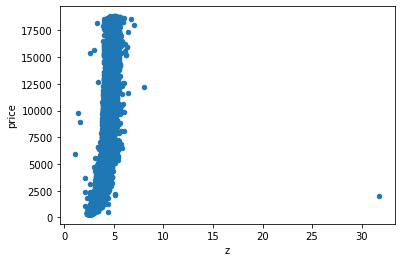

In [142]:
df.plot(x="z", y="price", kind="scatter")
plt.show()

Masih terdapat outlier pada angka 30, mari kita cek

In [146]:
df.loc[df["z"] > 30]

,carat,cut,color,clarity,depth,table,price,x,y,z
48410,0.51,Very Good,E,VS1,61.8,54.7,1970,5.12,5.15,31.8


In [147]:
x_vs1_3 = df[(df["cut"]=="Very Good") & (df["color"]=="E") & (df["clarity"]=="VS1") & (df["carat"]==0.51)]
x_vs1_3

,carat,cut,color,clarity,depth,table,price,x,y,z
44391,0.51,Very Good,E,VS1,58.1,60.0,1583,5.28,5.32,3.08
44941,0.51,Very Good,E,VS1,64.4,55.0,1634,5.03,5.07,3.25
44955,0.51,Very Good,E,VS1,62.0,61.0,1636,5.11,5.14,3.18
45690,0.51,Very Good,E,VS1,60.4,59.0,1697,5.16,5.20,3.13
45875,0.51,Very Good,E,VS1,60.0,57.0,1717,5.18,5.25,3.13
45876,0.51,Very Good,E,VS1,61.0,59.0,1717,5.13,5.17,3.14
46490,0.51,Very Good,E,VS1,61.6,59.0,1778,5.10,5.12,3.15
47222,0.51,Very Good,E,VS1,61.1,59.0,1839,5.14,5.20,3.16
47235,0.51,Very Good,E,VS1,59.6,56.0,1841,5.19,5.24,3.11
48410,0.51,Very Good,E,VS1,61.8,54.7,1970,5.12,5.15,31.80


Untuk rata-rata nilai z dengan kriteria diatas yaitu 3.15

In [149]:
df.loc[48410, "z"] = 3.15
df.loc[48410]

carat           0.51
cut        Very Good
color              E
clarity          VS1
depth           61.8
table           54.7
price           1970
x               5.12
y               5.15
z               3.15
Name: 48410, dtype: object

Selanjutnya, mari kita cek kembali persebaran grafik

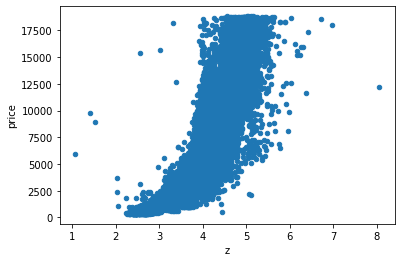

In [150]:
df.plot(x="z", y="price", kind="scatter")
plt.show()

Kolom z (depth in mm), juga memiliki trend kecenderungan peningkatan harga seiring meningkatnya nilai z. Sehingga, dapat disimpulkan bahwa harga diamond dapat dipengaruhi dengan nilai x, nilai y, dan nilai z

**3. Mengapa clarity SI2 lebih tinggi harganya dari rata-rata harga berlian dengan clarity IF?**

Menurut https://ajaib.co.id/faktor-harga-berlian-bisa-mahal/, terdapat beberapa faktor yang dapat mempengaruhi harga berlian selain clarity, yaitu
- berat karat
- warna berlian
- potongan berlian, berlian dengan potongan yang bagus, akan tampak lebih berkilau dan indah
- bentuk berlian, harga berlian bentuk bulat jauh lebih tinggi dibanding bentuk lain karena memiliki tingkat kesulitan serta ketelitian yang tinggi
- sertifikat berlian

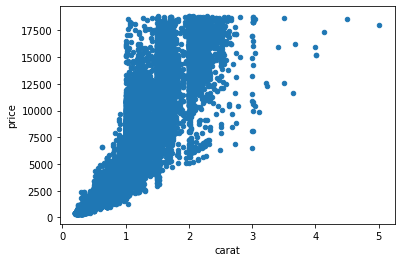

In [153]:
df.plot(x="carat", y="price", kind="scatter")
plt.show()

Dapat dilihat bahwa, terdapat trend peningkatan harga seiring dengan peningkatan carat. Mari kita lihat persebaran carat pada SI2 dan IF

In [155]:
carat_si2 = df[(df["clarity"]=="SI2")]
carat_si2

,carat,cut,color,clarity,depth,table,price,x,y,z
0,0.23,Ideal,E,SI2,61.5,55.0,326,3.95,3.98,2.43
4,0.31,Good,J,SI2,63.3,58.0,335,4.34,4.35,2.75
13,0.31,Ideal,J,SI2,62.2,54.0,344,4.35,4.37,2.71
14,0.20,Premium,E,SI2,60.2,62.0,345,3.79,3.75,2.27
16,0.30,Ideal,I,SI2,62.0,54.0,348,4.31,4.34,2.68
...,...,...,...,...,...,...,...,...,...,...
53902,0.77,Very Good,E,SI2,59.9,61.0,2753,5.98,6.01,3.59
53915,0.77,Ideal,E,SI2,62.1,56.0,2753,5.84,5.86,3.63
53928,0.79,Premium,E,SI2,61.4,58.0,2756,6.03,5.96,3.68
53938,0.86,Premium,H,SI2,61.0,58.0,2757,6.15,6.12,3.74


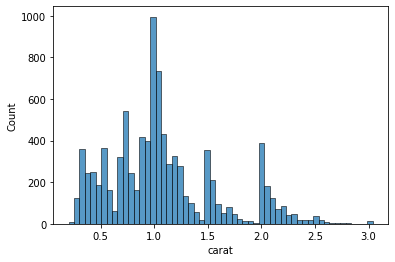

In [157]:
sns.histplot(x = "carat", data = carat_si2, multiple='stack');

In [158]:
carat_if = df[(df["clarity"]=="IF")]
carat_if

,carat,cut,color,clarity,depth,table,price,x,y,z
229,0.52,Ideal,F,IF,62.2,55.0,2783,5.14,5.18,3.21
250,0.55,Ideal,G,IF,60.9,57.0,2789,5.28,5.30,3.22
256,0.64,Ideal,G,IF,61.3,56.0,2790,5.54,5.58,3.41
281,0.72,Premium,I,IF,63.0,57.0,2795,5.72,5.70,3.60
304,0.60,Very Good,G,IF,61.6,56.0,2800,5.43,5.46,3.35
...,...,...,...,...,...,...,...,...,...,...
53790,0.54,Ideal,F,IF,62.2,54.0,2729,5.24,5.27,3.27
53792,0.51,Ideal,F,IF,62.5,54.0,2730,5.12,5.16,3.21
53811,0.52,Ideal,F,IF,61.7,57.0,2733,5.13,5.17,3.18
53887,0.52,Ideal,F,IF,61.5,57.0,2749,5.15,5.19,3.18


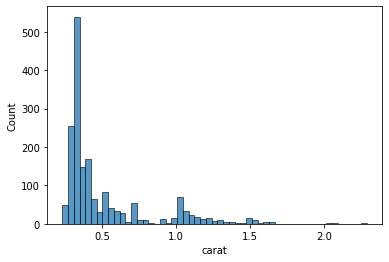

In [159]:
sns.histplot(x = "carat", data = carat_if, multiple='stack');

Berdasarkan nilai carat, pada IF cenderung memiliki nilai carat yang kecil yaitu <0.5 jika dibandingkan dengan SI2 yang memiliki kecenderungan memiliki carat yang lebih besar. Oleh karena itu, rata-rata harga dapat menjadi salah satu penyebab mengapa rata-rata harga SI2 lebih tinggi. Selanjutnya mari kita lihat dari warnanya

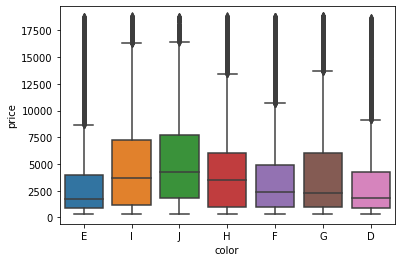

In [165]:
sns.boxplot(data=df, x="color", y="price")

Berdasarkan grafik diatas, pada warna J memiliki median price tertinggi. Sedangkan pada warna E dan D memiliki median price terendah. Mari kita cek untuk clarity SI2 dan IF

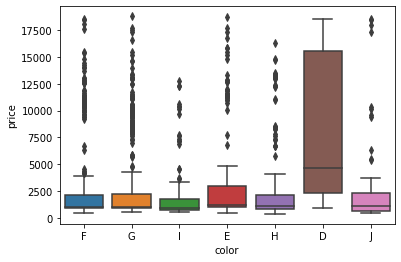

In [166]:
sns.boxplot(data=carat_if, x="color", y="price")

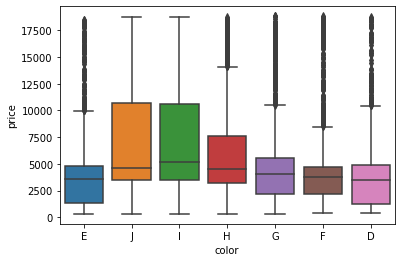

In [167]:
sns.boxplot(data=carat_si2, x="color", y="price")

Dari grafik diatas, dapat dilihat bahwa pada carat IF, memiliki warna D sebagai kontribusi warna terbesar. Sedangkan SI2, memiliki warna I sebagai kontribusi terbesar. Sehingga, dapat disimpulkan bahwa warna menjadi penentu mengapa rata-rata price SI2 memiliki harga yang tinggi. Mari kita cek pada variable depth

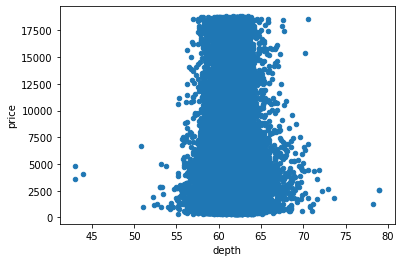

In [168]:
df.plot(x="depth", y="price", kind="scatter")
plt.show()

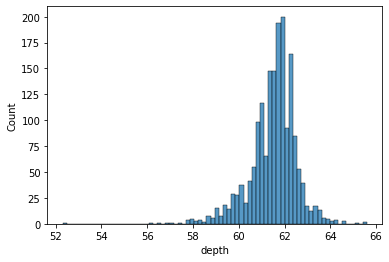

In [169]:
sns.histplot(x = "depth", data = carat_if, multiple='stack');

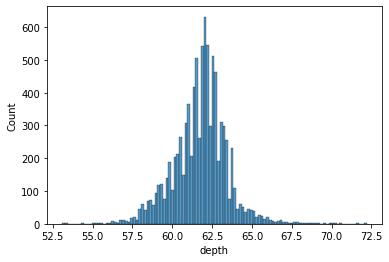

In [170]:
sns.histplot(x = "depth", data = carat_si2, multiple='stack');

Dari grafik diatas, dapat disimpulkan bahwa tidak terdapat perbedaan yang signifikan pada depth untuk kedua jenis clarity

Mari kita cek untuk jenis cut

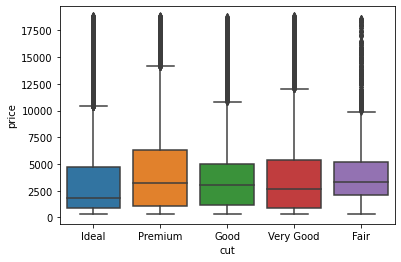

In [171]:
sns.boxplot(data=df, x="cut", y="price")

Terdapat sedikit keanehan pada grafik yaitu harga cut premium dan fair memiliki median yang hampir sama. Hal ini disebabkan karena terdapat banyak outlier, terutama pada jenis fair

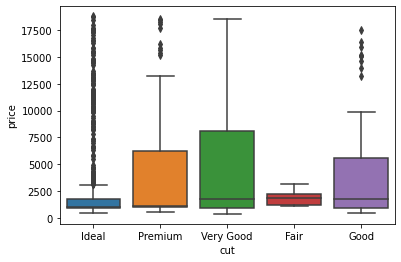

In [172]:
sns.boxplot(data=carat_if, x="cut", y="price")

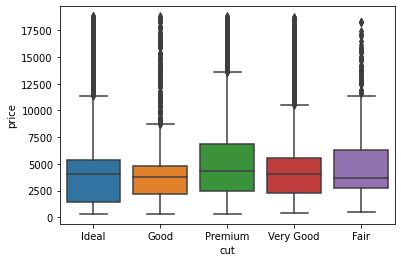

In [173]:
sns.boxplot(data=carat_si2, x="cut", y="price")

Pada grafik, dapat dilihat bahwa jenis cut pada si2 lebih baik dibandingkan IF

Oleh karena itu, dapat disimpulkan bahwa penyebab diamond SI2 memiliki harga yang lebih tinggi dibandingkan IF walaupun dari segi clarity IF lebih baik, yaitu karena:
- Pada SI2, memiliki jenis cut premium dengan price median yang tinggi, dibandingkan dengan IF yang cenderung memiliki jenis cut pada level good
- Pada SI2, memiliki color I dan J yang cenderung memiliki harga yang lebih besar dibandingkan warna lainnya
- Pada SI2, memiliki carat yang lebih besar dan bervariasi dibandingkan IF yang memiliki carat <0.5 dengan jumlah besar